In [9]:
import pandas as pd

In [10]:
import numpy as np

In [11]:
import seaborn as sns

In [12]:
import seaborn as sns

In [13]:
sns.set()

In [14]:
import matplotlib.pyplot as plt


In [15]:
import os

In [16]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam

Using TensorFlow backend.
c:\users\shyla\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\shyla\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\shyla\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [17]:

import warnings
warnings.filterwarnings("ignore")

In [18]:
path= '/Users/shyla/Desktop/Dataset/'

In [19]:
train_text =  pd.read_csv(path+'training_text', sep='\|\|', header=None, skiprows = 1, names=["ID", "Text"])

In [20]:
train_text =  pd.read_csv(path+'training_text', sep='\|\|', header=None, skiprows = 1, names=["ID", "Text"])
train_variants =  pd.read_csv(path+'training_variants')

In [21]:
train_text.shape

(3321, 2)

In [22]:
train_variants.shape

(3321, 4)

In [23]:
#merging text with train datas
train = pd.merge(train_variants,train_text, how='left',on='ID')
#left join based on its id

In [24]:
train.isnull().sum()
#print sum of missing values

ID           0
Gene         0
Variation    0
Class        0
Text         5
dtype: int64

In [25]:
#remove missing values such as null in dataset and copies to dataframe train
df_train = train.dropna(axis=0).copy()
#array dimension 
df_train.shape

(3316, 5)

In [26]:
df_train.head()
#gives top 5 rows ->head

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [27]:
df_train

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...
...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...
3317,3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...
3318,3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...
3319,3319,RUNX1,R80C,4,The RUNX1/AML1 gene is the most frequent targe...


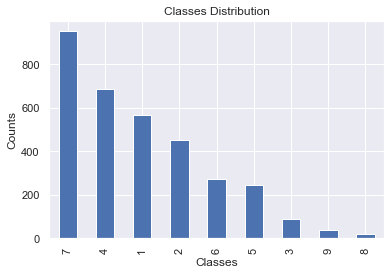

In [28]:
df_train.Class.value_counts().plot(kind="bar",title='Classes Distribution')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()
#shows count for classes 1-9

In [29]:
import re, string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shyla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
#getting english stopwords from nltk 
sw_list = stopwords.words('english')


In [31]:
#add punctuation
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘',"'", '©',
'said',"'s", "also",'one',"n't",'com', 'satirewire', '-', '–', "et al",
'—', '_','et al ',"/"]
sw_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
#eleminating duplicates by adding to set
sw_set = set(sw_list)

In [33]:
print(sw_set)

{'mustn', 'was', 'themselves', "'s", 'not', '$', '^', 'how', "mightn't", 'further', "shouldn't", 'did', "it's", 'about', 'wouldn', "'", 'have', 'do', '"', '’', 'you', 'can', '...', "you'll", 'these', '“', "she's", 'in', 'here', 'than', 'i', 'they', ']', 'said', 'or', 'didn', 'myself', 'its', 'weren', '{', 'me', "couldn't", 'because', 'until', 'am', 'y', 'too', "hasn't", "don't", "wasn't", 'there', 'be', "mustn't", 'it', 'below', 'over', 'hasn', 'again', '>', 'himself', 'were', 'such', 'no', 'an', 'his', 'with', "you've", "wouldn't", 'against', 'them', 'ma', '—', 'will', "haven't", 'that', ':', '_', 'had', 'won', 'after', 'whom', "you're", 're', 'any', 'while', '[', 'at', 'when', '=', 'm', 'couldn', '”', 'then', ',', '–', '-', 'should', 'et al', 'their', 'who', 'this', 'from', 'does', 'very', '|', 'him', 'where', 'ain', ')', '%', ';', 'satirewire', 'et al ', 'hers', 'few', "needn't", "''", 'for', 'more', 'needn', 'up', 'we', 'are', '(', '!', 'through', 'hadn', '?', 'yourselves', 'is', '

In [34]:
#tokenization using nltk
#word tokenization is used here -> sentence breaks into words
def process_review(review):
    tokens = nltk.word_tokenize(review)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed

In [35]:
#stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stemming(review):
    stemmed_review = []
    for w in review:
        stemmed_review.append(ps.stem(w))
    return stemmed_review 

In [36]:
# import libraries
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shyla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shyla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
#lemmatixation
#pos = v is verb of that word
def lemmatization(review):
    lemma_list=[]
    for word in review:
        lemma_word=lemmatizer.lemmatize(word,pos='v') 
        lemma_list.append(lemma_word)
    return lemma_list

In [38]:
from datetime import datetime

now = datetime.now()

print("Current Time =", now)

Current Time = 2021-09-27 19:40:58.456497


In [39]:
#obtaining cleaned text data
def data_preprocessing(review):
    #tokenization, stop words removal, punctuation marks removel
    now = datetime.now();
    t_starttime = now.strftime("%H:%M:%S")
    print("start Time tokenization=", t_starttime)
    processed_review=list(map(process_review,review))
    now = datetime.now()
    t_stoptime = now.strftime("%H:%M:%S")
    print("stop Time tokenization=", t_stoptime)
    # stemming
    now = datetime.now()
    l_starttime = now.strftime("%H:%M:%S")
    print("start Time stemming=", l_starttime)
    stemming_reviews=list(map(stemming,processed_review))
    now = datetime.now()
    l_stoptime = now.strftime("%H:%M:%S")
    print("stop Time stemming=", l_stoptime)
    # lemmatization
    now = datetime.now()
    s_starttime = now.strftime("%H:%M:%S")
    print("start Time lemmatization=", s_starttime)
    lemma_reviews=list(map(lemmatization,stemming_reviews))
    now = datetime.now()
    s_stoptime = now.strftime("%H:%M:%S")
    print("stop Time lemmatization=", s_stoptime)
    #print(lemma_reviews)
    return lemma_reviews

In [40]:
cleaned_train_text=data_preprocessing(df_train['Text'])


start Time tokenization= 19:41:14
stop Time tokenization= 19:45:13
start Time stemming= 19:45:13
stop Time stemming= 19:52:13
start Time lemmatization= 19:52:13
stop Time lemmatization= 19:53:21


In [41]:

import pickle
pickle_out1=open('cleaned_train_text', 'wb')
pickle.dump(cleaned_train_text, pickle_out1)
pickle_out1.close()

In [42]:
import pickle
pickle_in_train = open("cleaned_train_text","rb")
cleaned_train_text = pickle.load(pickle_in_train)

In [43]:
df_train['cleaned_text']=[" ".join(i) for i in cleaned_train_text]

In [44]:
df_train

,ID,Gene,Variation,Class,Text,cleaned_text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,cyclin-depend kinas cdk regul varieti fundamen...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,abstract background non-smal cell lung cancer ...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,abstract background non-smal cell lung cancer ...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,recent evid demonstr acquir uniparent disomi a...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,oncogen mutat monomer casita b-lineag lymphoma...
...,...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...,introduct myelodysplast syndrom md heterogen g...
3317,3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...,introduct myelodysplast syndrom md heterogen g...
3318,3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...,runt-rel transcript factor 1 gene runx1 alias ...
3319,3319,RUNX1,R80C,4,The RUNX1/AML1 gene is the most frequent targe...,runx1/aml1 gene frequent target chromosom tran...


In [45]:
#declare inputs and target
inputs=df_train[['ID', 'Gene', 'Variation','cleaned_text']]
target=df_train.Class

In [46]:
inputs

,ID,Gene,Variation,cleaned_text
0,0,FAM58A,Truncating Mutations,cyclin-depend kinas cdk regul varieti fundamen...
1,1,CBL,W802*,abstract background non-smal cell lung cancer ...
2,2,CBL,Q249E,abstract background non-smal cell lung cancer ...
3,3,CBL,N454D,recent evid demonstr acquir uniparent disomi a...
4,4,CBL,L399V,oncogen mutat monomer casita b-lineag lymphoma...
...,...,...,...,...
3316,3316,RUNX1,D171N,introduct myelodysplast syndrom md heterogen g...
3317,3317,RUNX1,A122*,introduct myelodysplast syndrom md heterogen g...
3318,3318,RUNX1,Fusions,runt-rel transcript factor 1 gene runx1 alias ...
3319,3319,RUNX1,R80C,runx1/aml1 gene frequent target chromosom tran...


In [47]:
target


0       1
1       2
2       2
3       3
4       4
       ..
3316    4
3317    1
3318    1
3319    4
3320    4
Name: Class, Length: 3316, dtype: int64

In [48]:
#train test split dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=.2, random_state=0)

In [49]:
x_train.cleaned_text

2979    thymoma thymic carcinoma rare intrathorac mali...
1184    pi3k/pten/akt signal pathway pathway involv ce...
2411    recent mutat foxl2 gene consist identifi adult...
2994    gastrointestin stromal tumor gist often associ...
2690    noonan syndrom character short statur facial d...
                              ...                        
835     xeroderma pigmentosum xp complement group f fi...
3269    oncogen fusion ret rearrang transfect gene rec...
1657    flt3 receptor tyrosin kinas constitut activ in...
2611    abstract germlin mutat inactiv tumor suppresso...
2736    select inhibit protein tyrosin kinas gain impo...
Name: cleaned_text, Length: 2652, dtype: object

In [50]:
x_test

,ID,Gene,Variation,cleaned_text
453,453,TP53,H168R,tumor suppressor protein p53 act transcript fa...
1541,1541,ALK,L1198F,era person medicin understand molecular driver...
2615,2615,BRCA1,T47D,brca1 accumul nuclear foci s-phase reassembl d...
628,628,FBXW7,R505L,î³-secretas inhibitor gsi block notch receptor...
482,482,TP53,G334R,abstract purpos adrenocort carcinoma acc rare ...
...,...,...,...,...
53,53,PTPRT,N510K,receptor protein tyrosin phosphatas ptprt/ptpï...
1490,1490,FGFR2,FGFR2-FAM76A Fusion,retrospect studi demonstr nearli 50 patient ov...
2966,2966,KIT,I563_L576del,gastrointestin stromal tumor gist activ mutat ...
2920,2920,NFE2L2,T80K,strategi propos chemoprevent degen diseas canc...


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
def vectorizer(train,test):
    vectorizer=CountVectorizer()
    new_train=vectorizer.fit_transform(train)
    new_test=vectorizer.transform(test)
    return new_train,new_test

In [53]:
#vectorization
gene_train,gene_test=vectorizer(x_train.Gene,x_test.Gene)
variation_train,variation_test=vectorizer(x_train.Variation,x_test.Variation)
cleaned_text_train,cleaned_text_test=vectorizer(x_train.cleaned_text,x_test.cleaned_text)

In [50]:
pickle_out2 = open('gene_train', 'wb')
pickle.dump(gene_train, pickle_out2)
pickle_out2.close()

In [54]:
import gensim

In [55]:
# Word2Vec related libraries
from gensim.models import KeyedVectors

In [56]:
model = KeyedVectors.load_word2vec_format ('GoogleNews-vectors-negative300.bin', binary=True)

In [57]:
model.similar_by_word('mutation')

[('mutations', 0.8541922569274902),
 ('genetic_mutation', 0.824504554271698),
 ('mutated_gene', 0.7879970669746399),
 ('gene_mutation', 0.7823827862739563),
 ('genetic_mutations', 0.7393667101860046),
 ('gene', 0.7343353033065796),
 ('gene_mutations', 0.72752445936203),
 ('genetic_variant', 0.7182294130325317),
 ('alleles', 0.7164379954338074),
 ('mutant_gene', 0.7144375443458557)]

In [58]:
def get_average_vector(text):
    tokens = [w.lower() for w in word_tokenize(text) if w.lower() not in sw_set]
    return np.mean(np.array([model[w] for w in tokens if w in model]), axis=0)



In [59]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [85]:
model.similar_by_vector(get_average_vector(x_train.loc[3,'cleaned_text']))

[('0_&&', 0.7663634419441223),
 ('i_####.##_subds', 0.7424254417419434),
 ('=_strlen', 0.7416331768035889),
 ('host_=_document.location.host', 0.7358684539794922),
 ('love_veronica_Mars', 0.7275804877281189),
 ('P._###a', 0.7251785397529602),
 ('By_Yoo_Cheong', 0.7224189043045044),
 ('DIRECTORS_OF_CAPITAL_CORP.', 0.7167680859565735),
 ('pY_@_q', 0.7151070237159729),
 ('CNA_fa', 0.7144803404808044)]

In [70]:
model.similar_by_vector(get_average_vector(x_train.loc[0,'Variation']))

[('mutations', 0.8183542490005493),
 ('mutation', 0.7133288979530334),
 ('genetic_mutations', 0.6473133563995361),
 ('mutant_alleles', 0.6360776424407959),
 ('truncating', 0.6239595413208008),
 ('gene_mutations', 0.6219684481620789),
 ('deleterious_mutations', 0.6211935877799988),
 ('missense_mutations', 0.6196743249893188),
 ('alleles', 0.6160933375358582),
 ('mutational', 0.6154875755310059)]

In [86]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score,make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
f1 = make_scorer(f1_score , average='weighted')

def NB_GridSearch(X_train, y_train):
    grid_params = {'alpha':[0.1,0.2,0.3,0.4,0.5],
                     'fit_prior': [True, False],  }
    
    gs = GridSearchCV( MultinomialNB(), grid_params,scoring=f1, cv=10)
    gs.fit(X_train, y_train)
    print("Best Score: ", gs.best_score_)
    print("Best Alpha: ", gs.best_params_)

    return gs.best_params_.values()

In [87]:
def NaiveBayes(X_train,y_train,X_test,y_test,alpha,fit_prior):    
    # fit the training dataset on the NB classifier
    Naive = MultinomialNB(alpha=0.1, fit_prior= True)
    Naive.fit(X_train,y_train)
    #prediction
    nb_train_pre=Naive.predict(X_train)
    nb_test_pre=Naive.predict(X_test)
    # Use accuracy_score function to get the accuracy
    print("Naive Bayes Train Accuracy Score :",accuracy_score(nb_train_pre, y_train))
    print("Naive Bayes Test Accuracy Score :",accuracy_score(nb_test_pre, y_test))
    # calculate f1 scores for test data and train data 
    nb_f1_score_test=f1_score(y_test,nb_test_pre,average='weighted')
    nb_f1_score_train=f1_score(y_train,nb_train_pre,average='weighted')
    print("Train data f1 score:{}".format(nb_f1_score_train))
    print("Test data f1 score:{}".format(nb_f1_score_test ))
    print("confusion_matrix:{}".format(confusion_matrix(y_test, nb_test_pre)))
    print('==================================================================')
    return nb_train_pre,nb_test_pre

In [88]:
# to get best score and best alpha
alpha1,fit_prior1=NB_GridSearch(gene_train, y_train)
alpha2,fit_prior2=NB_GridSearch(variation_train, y_train)
alpha3,fit_prior3=NB_GridSearch(cleaned_text_train, y_train)

Best Score:  0.5257189690239124
Best Alpha:  {'alpha': 0.1, 'fit_prior': True}
Best Score:  0.2436653537728664
Best Alpha:  {'alpha': 0.1, 'fit_prior': True}
Best Score:  0.5972082893090115
Best Alpha:  {'alpha': 0.2, 'fit_prior': False}


In [89]:
# results
nb_train_pre1,nb_test_pre1=NaiveBayes(gene_train,y_train,gene_test,y_test,alpha1,fit_prior1)
nb_train_pre2,nb_test_pre2=NaiveBayes(variation_train,y_train,variation_test,y_test,alpha1,fit_prior1)
nb_train_pre3,nb_test_pre3=NaiveBayes(cleaned_text_train,y_train,cleaned_text_test,y_test,alpha1,fit_prior1)

Naive Bayes Train Accuracy Score : 0.6202865761689291
Naive Bayes Test Accuracy Score : 0.5557228915662651
Train data f1 score:0.5938716716513411
Test data f1 score:0.5209114787901074
confusion_matrix:[[ 48   1   0  22  12   6  11   0   0]
 [  1  19   0   5   0   1  71   0   0]
 [  2   0   0   6   3   0  14   0   0]
 [ 30   0   0  95  15   5  10   0   0]
 [  5   0   0   4  24   6  12   0   0]
 [  4   1   0   2  11  15  16   0   0]
 [  1   8   0   4   0   0 162   0   1]
 [  0   1   0   0   1   0   0   2   1]
 [  0   0   0   0   1   0   1   0   4]]
Naive Bayes Train Accuracy Score : 0.9739819004524887
Naive Bayes Test Accuracy Score : 0.3313253012048193
Train data f1 score:0.9726511929998076
Test data f1 score:0.22919963137169627
confusion_matrix:[[ 28   0   0   0   0   0  72   0   0]
 [  1  18   0   0   0   0  78   0   0]
 [  0   0   0   0   0   0  25   0   0]
 [  5   0   0   2   0   0 148   0   0]
 [  0   0   0   1   0   0  50   0   0]
 [  2   0   0   0   0   0  47   0   0]
 [  1   3  

In [90]:
#import Logistic Regression
from sklearn.linear_model import LogisticRegression

def Logistic_Regression(X_train, y_train,X_test, y_test):
    log_re = LogisticRegression(max_iter=1000)
    log_re.fit(X_train, y_train)
    #calculate scores for test data and train data 
    test_data_score = log_re.score(X_test, y_test)
    train_data_score = log_re.score(X_train, y_train)
    print("Train data score:{}".format(train_data_score ))
    print("Test data score:{}".format(test_data_score ))
    # predict values for test data and train data
    log_y_test_pre=log_re.predict(X_test)
    log_y_train_pre=log_re.predict(X_train)
    # calculate f1 scores for test data and train data 
    log_f1_score_test=f1_score(y_test,log_y_test_pre,average="weighted")
    log_f1_score_train=f1_score(y_train,log_y_train_pre,average="weighted")

    print("Train data f1 score:{}".format(log_f1_score_train))
    print("Test data f1 score:{}".format(log_f1_score_test ))
    print('=================================================================')
    return log_y_train_pre,log_y_test_pre

In [91]:
log_y_train_pre1,log_y_test_pre1=Logistic_Regression(gene_train, y_train,gene_test, y_test)
log_y_train_pre2,log_y_test_pr2=Logistic_Regression(variation_train, y_train,variation_test, y_test)
log_y_train_pre3,log_y_test_pre3=Logistic_Regression(cleaned_text_train, y_train,cleaned_text_test, y_test)

Train data score:0.6142533936651584
Test data score:0.552710843373494
Train data f1 score:0.5850726064226811
Test data f1 score:0.5151485394061638
Train data score:0.7861990950226244
Test data score:0.3313253012048193
Train data f1 score:0.7142818221087148
Test data f1 score:0.22813058302122258
Train data score:0.8842383107088989
Test data score:0.6475903614457831
Train data f1 score:0.8838999627199686
Test data f1 score:0.6460049568248708
